In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
def merge_data(results_folder, position_t=999, plot_title = 'Average \u0394F/F0'):
    
    try:
        os.mkdir(f"{results_folder}/merged_data")

    except:
        pass
    

    position_t_column = np.arange(0,position_t)
    position_t_array = pd.DataFrame(position_t_column, columns = ['POSITION_T'])
    
    output_file_path = f"{results_folder}/merged_data/merged_data.csv"
    POSITION_T_path = f"{results_folder}/merged_data/position_t.csv"
    position_t_array.to_csv(POSITION_T_path,index=False)
    
    for filename in os.listdir(results_folder):
        if filename.endswith(".csv"):
            POSITION_T = pd.read_csv(POSITION_T_path)
            data = f"{results_folder}/{filename}"
            column_name = os.path.splitext(filename)[0]
            df = pd.read_csv(data, usecols=['dF/F0','POSITION_T'])
            df.rename(columns = {"dF/F0": column_name}, inplace = True)
            joined = POSITION_T.merge(df, on = "POSITION_T", how='left')
            joined.to_csv(POSITION_T_path,index=False, na_rep = "")
    
    merged_data = pd.read_csv(POSITION_T_path, na_values = '')
    average_data = merged_data.drop('POSITION_T', 1)
    average_column = average_data.mean(axis=1)
    sem_column = average_data.sem(axis=1)
    
    merged_data_sort = merged_data.reindex(sorted(merged_data.columns), axis=1)
    
    cols = list(merged_data_sort.columns)
    cols = [cols[-1]] + cols[:-1]
    merged_data = merged_data_sort[cols]
    
    merged_data.to_csv(output_file_path,index=False, na_rep = "")
    
    merged_data_2 = pd.read_csv(output_file_path)
    merged_data_2['Average'] = average_column
    merged_data_2['SEM'] = sem_column
    
    
    merged_data_2.to_csv(output_file_path,index=False, na_rep = "")
    os.remove(POSITION_T_path)
    
    merged_plot = merged_data_2.plot.line(x="POSITION_T", y="Average", yerr="SEM", legend=False, title = plot_title)
    merged_plot.set_xlabel("Position T")
    merged_plot.set_ylabel("\u0394F/F0")
    merged_plot.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.savefig(f"{results_folder}/merged_data/Average_dF_F0.png", bbox_inches = "tight")
    

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


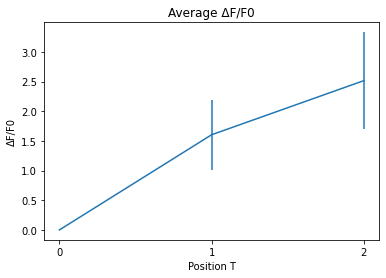

In [3]:
merge_data(r'/Users/alisasmacbook/Desktop/Neuron Tracking Paper/Practice 3 results run/Analysis/results', position_t=88, plot_title = 'Average \u0394F/F0')